<a href="https://colab.research.google.com/github/MorojMunshi/Lab/blob/main/Yet_another_copy_of_CIFAR10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

**CNN MODEL**

In [4]:
# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3182 - loss: 1.8430 - val_accuracy: 0.5071 - val_loss: 1.3674
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5432 - loss: 1.2768 - val_accuracy: 0.5814 - val_loss: 1.1558
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6131 - loss: 1.0994 - val_accuracy: 0.6233 - val_loss: 1.0688
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6505 - loss: 0.9985 - val_accuracy: 0.6361 - val_loss: 1.0315
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6764 - loss: 0.9229 - val_accuracy: 0.6685 - val_loss: 0.9305
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7056 - loss: 0.8486 - val_accuracy: 0.6684 - val_loss: 0.9529
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7213 - loss: 0.8002 - val_accuracy: 0.7010 - val_loss: 0.8802
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7371 - loss: 0.7542 - val_accuracy: 0.

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

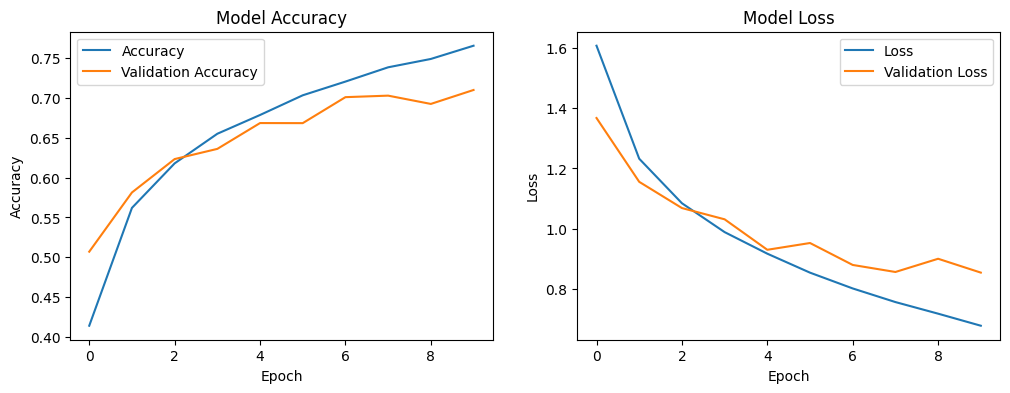

In [6]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

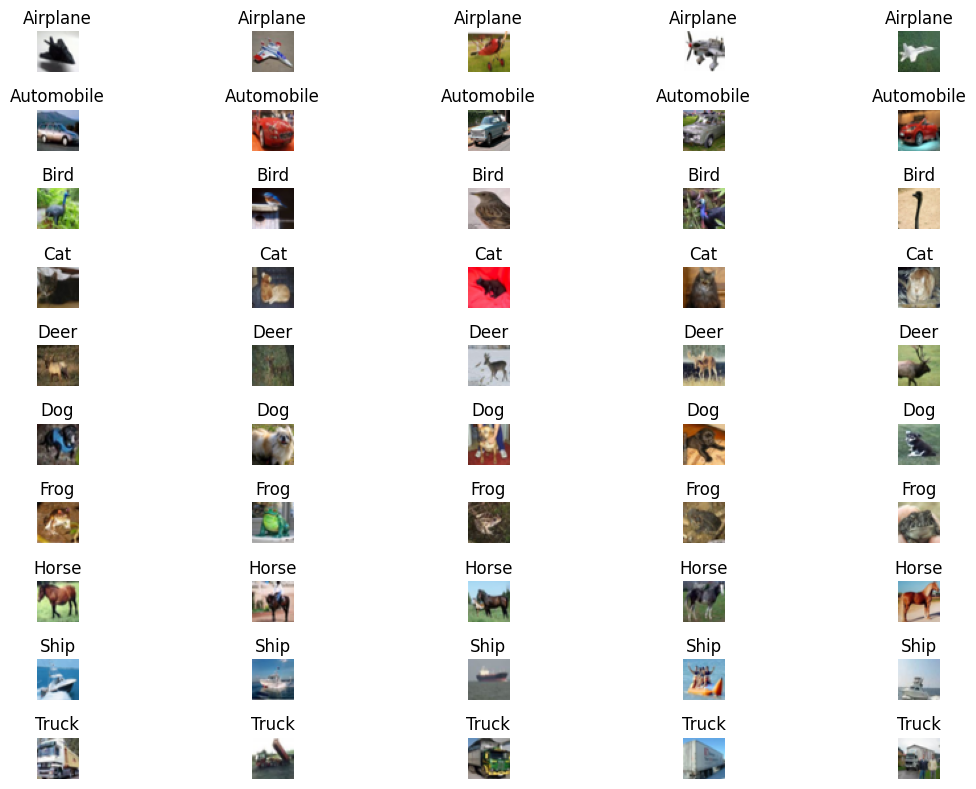

In [7]:
# Visualize a few images from each class
import numpy as np

def plot_classes(x_train, y_train, class_names):
    plt.figure(figsize=(12, 8))

    for i in range(len(class_names)):
        # Get indices for images of the current class
        indices = np.where(y_train == i)[0][:5]  # Take 5 images for each class
        for j, idx in enumerate(indices):
            plt.subplot(len(class_names), 5, i * 5 + j + 1)  # Arrange images in a grid
            plt.imshow(x_train[idx])
            plt.axis('off')  # Turn off axis
            plt.title(class_names[i])  # Set title to the class name

    plt.tight_layout()
    plt.show()

# Call the function to plot classes
plot_classes(x_train, y_train, class_names)


In [8]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train_rnn, y_train_rnn), (x_test_rnn, y_test_rnn) = cifar10.load_data()


In [9]:
# Normalize the pixel values to be between 0 and 1
x_train_rnn = x_train_rnn.astype('float32') / 255.0
x_test_rnn = x_test_rnn.astype('float32') / 255.0

# Reshape the data to fit the RNN input shape
# Shape: (num_samples, timesteps, features)
# Here, we consider each row of pixels (32 rows) as a timestep and each pixel as a feature (3 features for RGB)
x_train_rnn_reshaped = x_train_rnn.reshape(x_train_rnn.shape[0], x_train_rnn.shape[1], -1)  # (num_samples, 32, 96)
x_test_rnn_reshaped = x_test_rnn.reshape(x_test_rnn.shape[0], x_test_rnn.shape[1], -1)      # (num_samples, 32, 96)

**RNN MODEL**

In [10]:
# Create an RNN model
rnn_model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(32, 96), return_sequences=True),
    layers.SimpleRNN(64),
    layers.Dense(10, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(x_train_rnn_reshaped, y_train_rnn, epochs=10, batch_size=64, validation_data=(x_test_rnn_reshaped, y_test_rnn))

# Evaluate the model
test_loss_rnn, test_acc_rnn = rnn_model.evaluate(x_test_rnn_reshaped, y_test_rnn, verbose=2)
print(f'\nTest accuracy (RNN): {test_acc_rnn}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.2405 - loss: 2.0531 - val_accuracy: 0.2695 - val_loss: 1.9816
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.3245 - loss: 1.8475 - val_accuracy: 0.3471 - val_loss: 1.7764
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3549 - loss: 1.7760 - val_accuracy: 0.2926 - val_loss: 1.9552
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3110 - loss: 1.8772 - val_accuracy: 0.2640 - val_loss: 1.9355
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3021 - loss: 1.9107 - val_accuracy: 0.3134 - val_loss: 1.8492
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3253 - loss: 1.8265 - val_accuracy: 0.3188 - val_loss: 1.8425
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3373 - loss: 1.7920 - val_accuracy: 0.3415 - val_loss: 1.8047
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3557 - loss: 1.7522 - val_a

In [12]:
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32, 64)              │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,632 (225.13 KB)

 Trainable params: 19,210 (75.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,422 (150.09 KB)

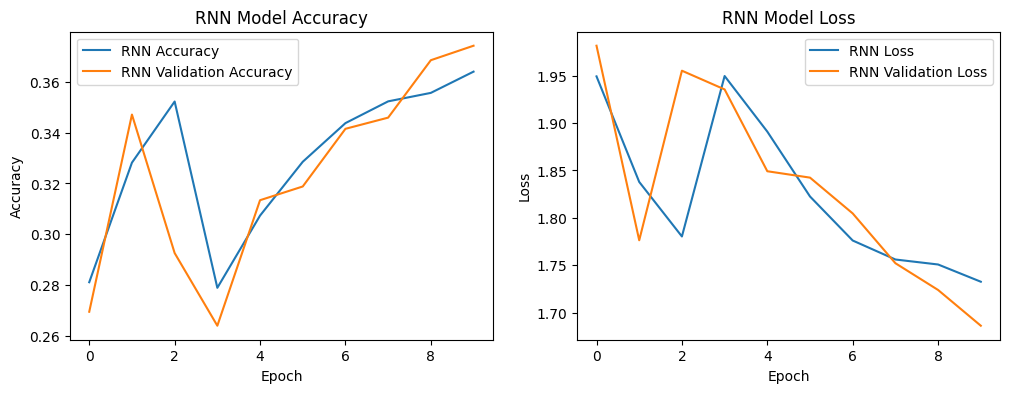

In [13]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='RNN Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='RNN Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

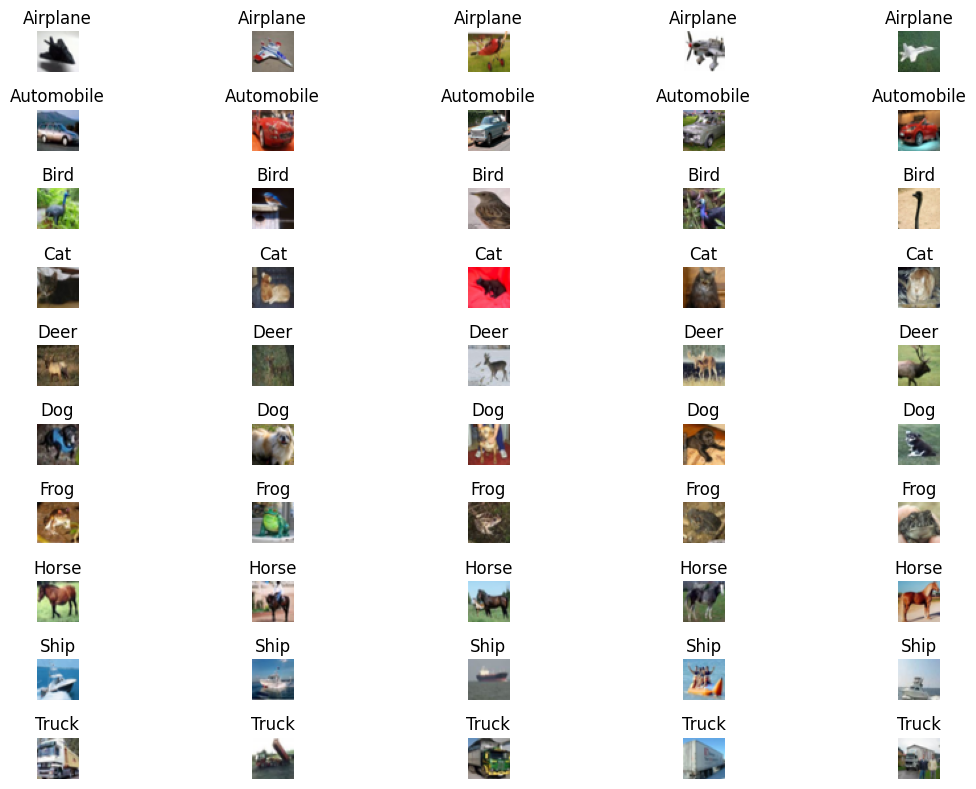

In [14]:
# Visualize a few images from each class
import numpy as np

def plot_classes(x_train, y_train, class_names):
    plt.figure(figsize=(12, 8))

    for i in range(len(class_names)):
        # Get indices for images of the current class
        indices = np.where(y_train == i)[0][:5]  # Take 5 images for each class
        for j, idx in enumerate(indices):
            plt.subplot(len(class_names), 5, i * 5 + j + 1)  # Arrange images in a grid
            plt.imshow(x_train[idx])
            plt.axis('off')  # Turn off axis
            plt.title(class_names[i])  # Set title to the class name

    plt.tight_layout()
    plt.show()

# Call the function to plot classes
plot_classes(x_train_rnn, y_train_rnn, class_names)

What is an Adversarial Attack and Why is it Here?

An adversarial attack modifies input data with small, imperceptible changes to fool a machine learning model into making incorrect predictions. It is included here to:

	1.	Test Model Robustness: Measure how well the model handles manipulated inputs.
	2.	Enhance Security: Ensure the model can resist attacks in critical applications.
	3.	Improve Performance: Identify weaknesses and retrain the model to make it stronger.

This step comes after training and before evaluation to compare the model’s accuracy on clean vs. adversarial data, highlighting areas for improvement.

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3215 - loss: 1.8363 - val_accuracy: 0.4933 - val_loss: 1.4273
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5435 - loss: 1.2873 - val_accuracy: 0.5869 - val_loss: 1.1711
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6037 - loss: 1.1190 - val_accuracy: 0.6347 - val_loss: 1.0543
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6495 - loss: 1.0150 - val_accuracy: 0.6499 - val_loss: 1.0123
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6734 - loss: 0.9451 - val_accuracy: 0.6664 - val_loss: 0.9511
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6956 - loss: 0.8751 - val_accuracy: 0.6865 - val_loss: 0.9195
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7174 - loss: 0.8138 - val_accuracy: 0.6969 - val_loss: 0.8807
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7341 - loss: 0.7757 - val_accuracy: 0.

Original image prediction: 3


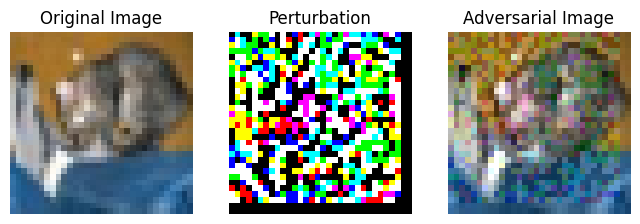

In [11]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Data Preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]

# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Crafting Adversarial Examples
# Implementing FGSM (Fast Gradient Sign Method)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def create_adversarial_pattern(model, image, label):
  image = tf.convert_to_tensor(image)
  label = tf.convert_to_tensor(label)
  with tf.GradientTape() as tape: # Removed extra indent
    tape.watch(image)
    prediction = model(image)
    loss = loss_object(label, prediction)

    # Get the gradients of the loss w.r.t the input image
    gradient = tape.gradient(loss, image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

# Take one sample from the test set
sample_image = x_test[0:1]  # Shape: (1, 32, 32, 3)
sample_label = y_test[0:1]  # Shape: (1, 1)

# Create an adversarial example
perturbations = create_adversarial_pattern(model, sample_image, sample_label)
epsilon = 0.1  # Strength of the perturbation
adversarial_image = sample_image + epsilon * perturbations
adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)  # Ensure values are in [0, 1]

# Evaluate the model's performance on the adversarial image
predicted_label = model.predict(adversarial_image)
print("\nAdversarial example prediction:", np.argmax(predicted_label))

# Compare with the original image
original_prediction = model.predict(sample_image)
print("Original image prediction:", np.argmax(original_prediction))

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(sample_image[0])
plt.axis('off')

# Adversarial perturbation
plt.subplot(1, 3, 2)
plt.title("Perturbation")
plt.imshow(perturbations[0].numpy().squeeze(), cmap='gray')
plt.axis('off')

# Adversarial image
plt.subplot(1, 3, 3)
plt.title("Adversarial Image")
plt.imshow(adversarial_image[0].numpy())
plt.axis('off')

plt.show()

**Decision Tree**

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
# تحميل بيانات CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# تحويل الصور إلى شكل مسطح (لأن Decision Tree لا يتعامل مع البيانات ثلاثية الأبعاد)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# تهيئة وتصنيف نموذج Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_flat, y_train.ravel())

# توقع وتحليل النتائج
y_pred = dt_model.predict(x_test_flat)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Test Accuracy:", accuracy)

Decision Tree Test Accuracy: 0.2663
